<a href="https://colab.research.google.com/github/Gweneal3/DeepLearning_YT/blob/master/MNIST%20Handwritten%20Digit%20Classification/MNIST_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load mnist dataset

In [135]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [136]:
type(X_train)

numpy.ndarray

In [137]:
print(X_train.shape, Y_train.shape,)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Training data -> 60,000 images, Image dimension -> 28x28

In [138]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

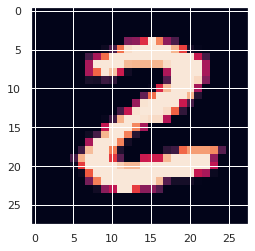

2


In [156]:
# display image
plt.imshow(X_train[25])
plt.show()

# print the correspoinding label
print(Y_train[25])

Image Label

In [140]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this dataset, If not, we need to resize them

In [158]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [142]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Build NN

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [144]:
# compiling NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [145]:
# train NN
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.9152
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9592
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1015 - accuracy: 0.9691
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0819 - accuracy: 0.9746
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9789
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9814
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9837
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9855
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0397 - accuracy: 0.9873
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

In [146]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 25.4167 - accuracy: 0.9714


In [159]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [160]:
print(Y_pred[0])

[3.7069904e-04 2.5554247e-02 7.7149317e-02 9.4054997e-01 6.5129115e-08
 2.5388519e-03 9.1468749e-13 9.9999917e-01 9.9802739e-04 9.5767081e-01]


In [161]:
# convert prediction probability to class label
Y_pred_label = [np.argmax(i) for i in Y_pred]

In [162]:
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [163]:
print(Y_test)

[7 2 1 ... 4 5 6]


Confusion Matrix

In [164]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)

In [165]:
print(conf_mat)

tf.Tensor(
[[ 970    1    1    0    2    1    1    1    3    0]
 [   0 1129    0    2    0    0    2    0    2    0]
 [   6    1 1005    7    0    1    1    6    4    1]
 [   0    0    6  979    0    9    0    5    7    4]
 [   3    1    1    0  967    0    1    1    0    8]
 [   2    1    0   25    1  855    2    0    4    2]
 [  10    1    2    1   11   19  910    0    4    0]
 [   1   11   11    6    4    1    0  984    3    7]
 [   5    0    5    8    5    7    1    0  940    3]
 [   4    4    0    6   10    4    0    0    8  973]], shape=(10, 10), dtype=int32)


Text(0.5, 39.5, 'Predicted Labels')

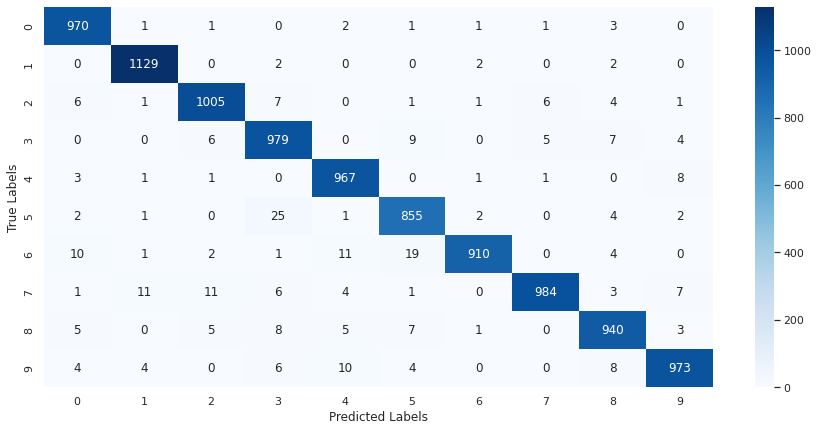

In [166]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,cmap='Blues', annot=True, fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Build Predictive System

In [171]:
from skimage import io

Enter the image path:https://images.unsplash.com/photo-1587642667788-5c994cf1efee?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80
RGB


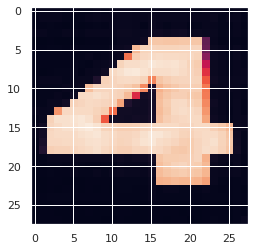

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as 4


In [279]:
input_image_path = input("Enter the image path:")
input_image = io.imread(input_image_path)

img = Image.fromarray(input_image)
print(img.mode)

grey_scaled_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
image_resized = cv2.resize(grey_scaled_image,(28,28))

plt.imshow(image_resized)
plt.show()

image_resized = image_resized/255
image_reshaped = np.reshape(image_resized,[1,28,28])

prediction = model.predict(image_reshaped)
prediction_label = np.argmax(prediction)
print('The Handwritten Digit is recognised as', prediction_label)